# Desafío Spike: G. Nicolás Villalobos Zaid

## Parte 1: datos descargados desde github

## Parte 2: Análisis del dataset

Primero cargamos algunas de los paquetes que vamos a utilizar, configuramos algunas opciones y leemos el dataset haciendo el parse de las fechas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
df = pd.read_csv('caudal_extra.csv', parse_dates=['fecha'])

Revisamos las dimensiones del dataset inicial.

In [4]:
df.shape

(1411180, 17)

Revisamos tambien el tipo de dato al que nos enfrentamos en las distintas columnas del dataset y veremos una descripción general sobre las columnas numéricas.

In [5]:
df.dtypes

Unnamed: 0                              int64
codigo_estacion                         int64
institucion                            object
fuente                                 object
nombre                                 object
altura                                  int64
latitud                               float64
longitud                              float64
codigo_cuenca                           int64
nombre_sub_cuenca                      object
cantidad_observaciones                  int64
fecha                     datetime64[ns, UTC]
caudal                                float64
gauge_id                                int64
gauge_name                             object
precip_promedio                       float64
temp_max_promedio                     float64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


De lo anterior se logra apreciar que las variables precip_promedio y temp_max_promedio tienen missing values ya que el total de datos es menor al número total de registros, lo cual es esperable, dado que no todas las estaciones de medición están cercanas a estaciones de medición de precipitaciones o temperaturas.

Revisamos entonces un sample de los datos para ver un poco que es lo que tenemos.

In [7]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
577930,577930,7383001,DGA,dga_web,Rio Maule En Forel,30,-35.406898,-72.208298,73,Rio Maule Bajo,11247,1997-10-10 00:00:00+00:00,832.000,7383001,Rio Maule En Forel,26.932259,11.283334
696667,696667,3431001,DGA,dga_web,Rio Copiapo En La Puerta,915,-27.804399,-70.126900,34,R. Copiapo Medio,23794,1961-04-05 00:00:00+00:00,0.919,3431001,Rio Copiapo En La Puerta,NaN,NaN
621644,621644,5410002,DGA,dga_web,Rio Aconcagua En Chacabuquito,950,-32.850300,-70.509399,54,Aconcagua Medio,26570,1967-06-09 00:00:00+00:00,10.400,5410002,Rio Aconcagua En Chacabuquito,0.000000,18.700001


Luego, nos interesa saber el número de estaciones distintas que se encuentran en el dataset.

In [8]:
df['nombre'].unique().shape

(133,)

Además, veremos la extensión temporal de los datos para cada cuenca.

In [9]:
for g in list(df.gauge_id.unique()):
    print (df['fecha'][df['gauge_id'] == g].min(), df['fecha'][df['gauge_id'] == g].max())

1960-01-02 00:00:00+00:00 1984-07-08 00:00:00+00:00
1995-08-24 00:00:00+00:00 2016-07-31 00:00:00+00:00
1999-06-13 00:00:00+00:00 2018-03-09 00:00:00+00:00
2000-01-01 00:00:00+00:00 2018-03-09 00:00:00+00:00
2000-01-01 00:00:00+00:00 2018-03-09 00:00:00+00:00
2002-03-12 00:00:00+00:00 2017-05-31 00:00:00+00:00
2002-04-10 00:00:00+00:00 2016-10-21 00:00:00+00:00
2002-12-20 00:00:00+00:00 2018-03-09 00:00:00+00:00
2003-01-01 00:00:00+00:00 2018-03-09 00:00:00+00:00
2006-01-01 00:00:00+00:00 2018-03-09 00:00:00+00:00
2007-09-26 00:00:00+00:00 2016-08-31 00:00:00+00:00
2009-08-01 00:00:00+00:00 2018-03-09 00:00:00+00:00
2009-08-05 00:00:00+00:00 2018-03-09 00:00:00+00:00
2014-01-01 00:00:00+00:00 2018-03-09 00:00:00+00:00
1999-02-16 00:00:00+00:00 2018-03-09 00:00:00+00:00
1999-03-03 00:00:00+00:00 2018-03-09 00:00:00+00:00
1963-04-11 00:00:00+00:00 2017-09-30 00:00:00+00:00
1963-04-01 00:00:00+00:00 2017-07-31 00:00:00+00:00
1985-08-06 00:00:00+00:00 2017-06-30 00:00:00+00:00
2001-04-23 0

Lo anterior nos indica que para cada cuenca posiblemente hay un número diferente de datos.

A continuación hacemos una descripción muy general de la frecuencia de los datos numéricos del dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B1BAA8BC8>,
      dtype=object)

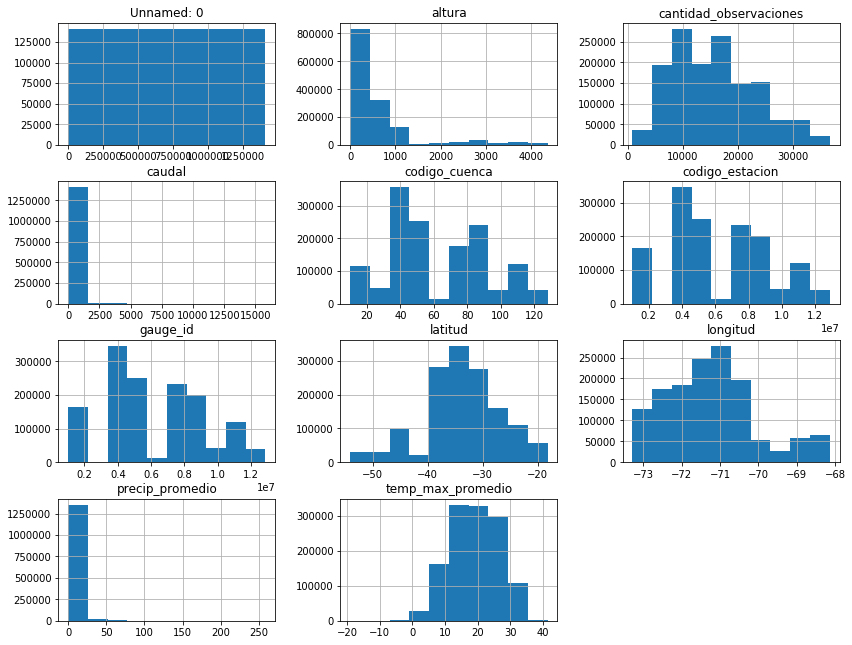

In [10]:
df.hist(figsize=(14,11))

A priori no se aprecia nada que pueda parecer muy extraño.

Veremos tambien si existe una relación identificable entre el caudal y las variables de precipitaciones y temperaturas.

C:\Users\gnico\Miniconda3\envs\datascience2\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


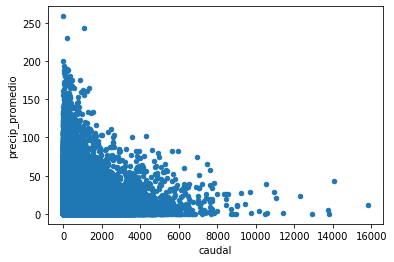

In [11]:
df.plot.scatter(x='caudal', y='precip_promedio')

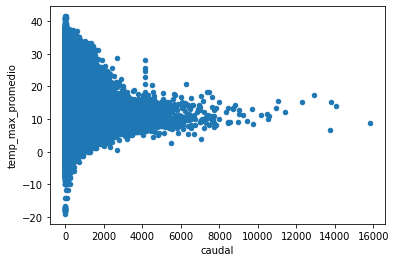

In [12]:
df.plot.scatter(x='caudal', y='temp_max_promedio')

De los gráficos anteriores no se aprecia una relación, esto se debe a que las magnitudes de los caudales son dependientes de las cuencas en las que se encuentran, lo que nos indica que este será un factor del que tendremos que hacernos cargo.

Para tener una mejor idea de la magnitud de los caudales de cada cuenca y de su distribución, revisaremos un boxplot agrupado por cuenca.

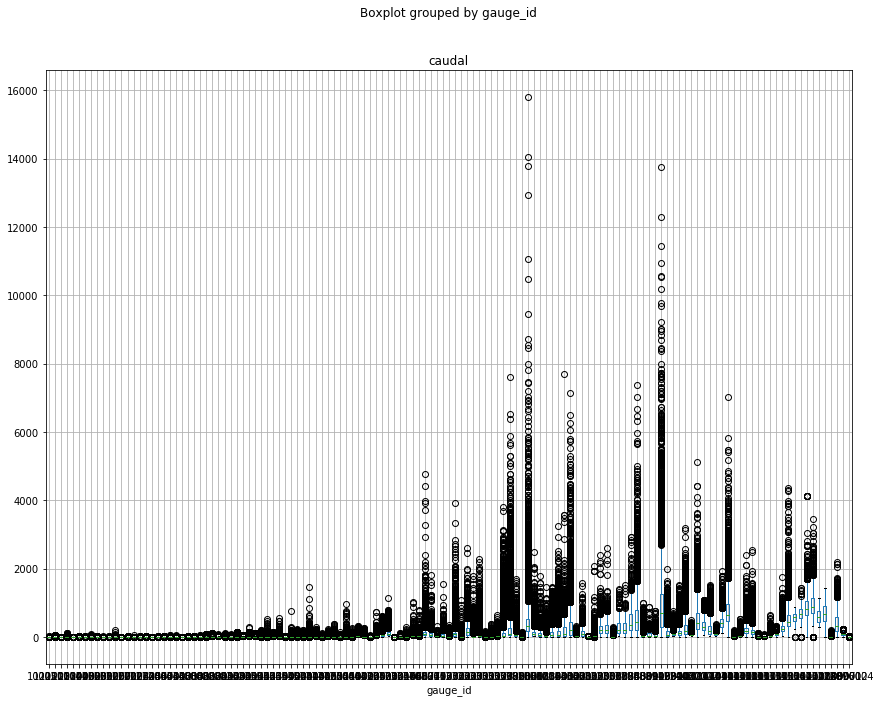

In [13]:
df.boxplot(column='caudal', by='gauge_id', figsize=(14,11))

Lo anterior logra ilustrar la diferencia de magnitud que puede existir entre cada cuenca.

## Parte 3: Plots

En primer lugar, quitaremos el timezone de la columna fecha ya que no es requerido y simplifica las funciones definidas a continuación.

In [14]:
df['fecha'] = df['fecha'].dt.tz_localize(None)

### Parte a
Escribimos la primera función solicitada.

In [15]:
def time_plot_una_estación(codigo_estacion, columna, fecha_min = '1970-01-01', fecha_max = '2019-12-31'):
    df_filtrado = df[(df['codigo_estacion'] == codigo_estacion) &
                     (df['fecha'] >= pd.to_datetime(fecha_min)) &
                     (df['fecha'] <= pd.to_datetime(fecha_max))]
    if(df_filtrado.shape[0] != 0):
        df_filtrado.plot(x='fecha', y=columna, figsize=(14,11))
    else:
        print('No data to plot, sorry :(')

Ahora la probaremos para una eestación particular con las 3 columnas que son de relevancia para estos gráficos.

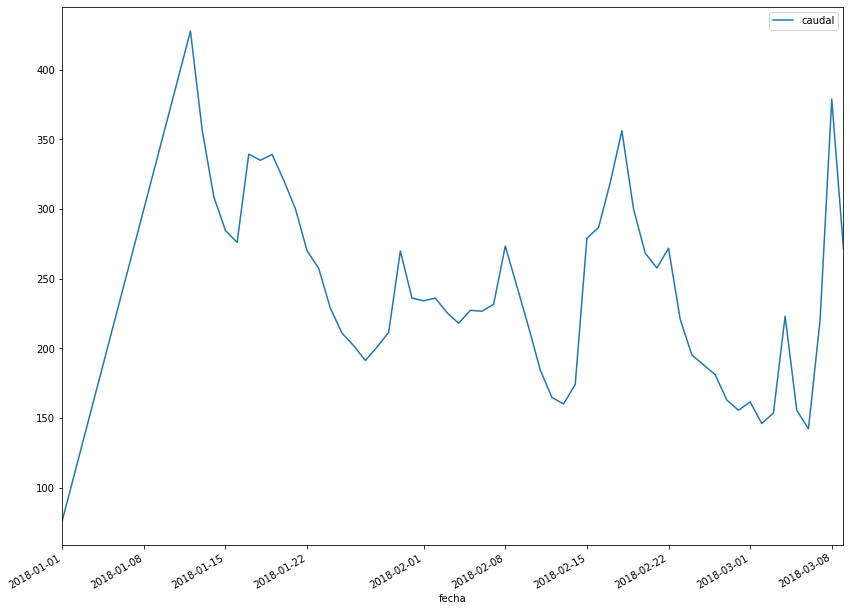

In [16]:
time_plot_una_estación(11337001, 
                       'caudal', 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

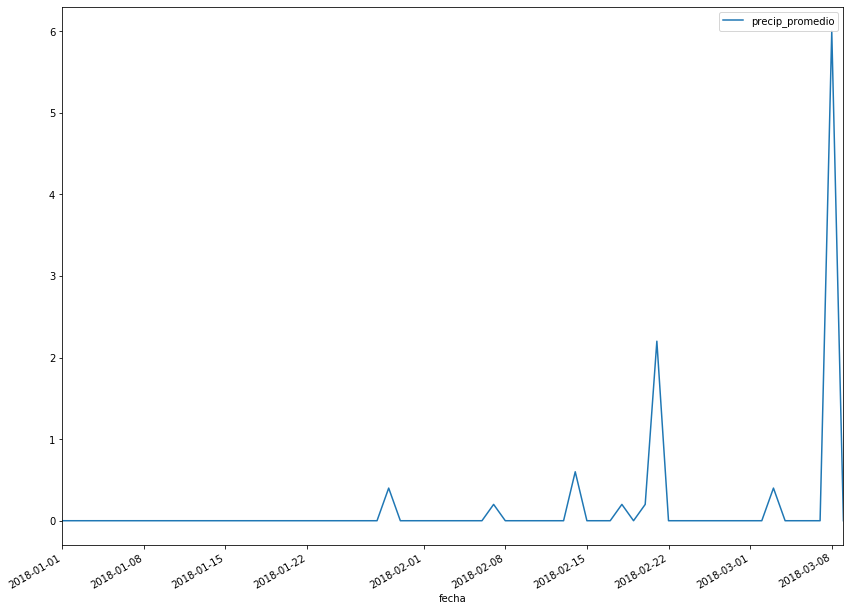

In [17]:
time_plot_una_estación(11337001, 
                       'precip_promedio', 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

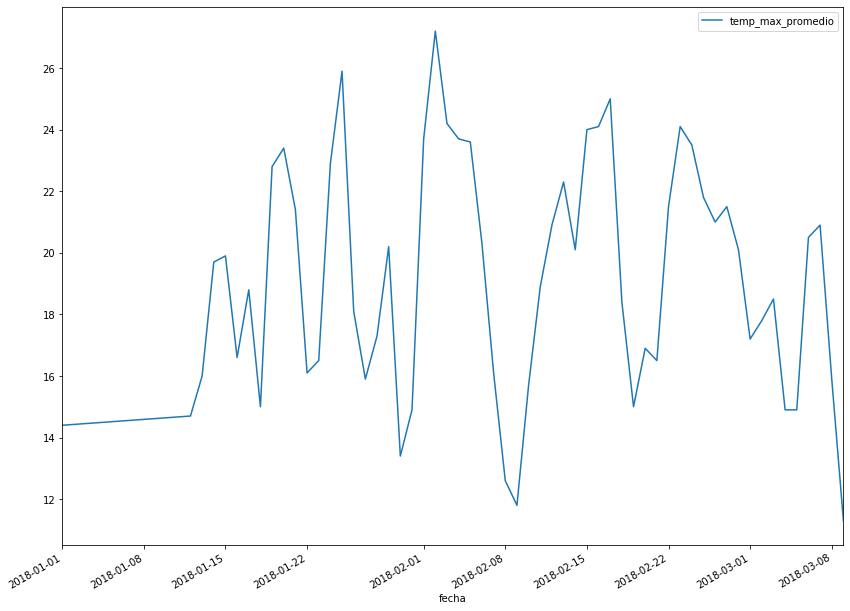

In [18]:
time_plot_una_estación(11337001, 
                       'temp_max_promedio', 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

### Parte b
Ahora escribimos la segunda función solicitada. Se debe notar que el escalamiento realizado es el escalamiento min-max, que deja todos los valores entre 0 y 1.

In [19]:
# normalizamos las columnas con min-max para dejarlas entre 0 y 1
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min = '1970-01-01', fecha_max = '2019-12-31'):
    df_filtrado = df[(df['codigo_estacion'] == codigo_estacion) &
                     (df['fecha'] >= pd.to_datetime(fecha_min)) &
                     (df['fecha'] <= pd.to_datetime(fecha_max))].copy()
    if(df_filtrado.shape[0] != 0):
        ax = plt.gca()
        for c in columnas:
            df_filtrado[c]=(df_filtrado[c]-df_filtrado[c].min())/(df_filtrado[c].max()-df_filtrado[c].min())
            df_filtrado.plot(x='fecha', y=c, ax=ax, figsize=(14,11))
        plt.show()
    else:
        print('No data to plot, sorry :(')

La probaremos para una estación en particular.

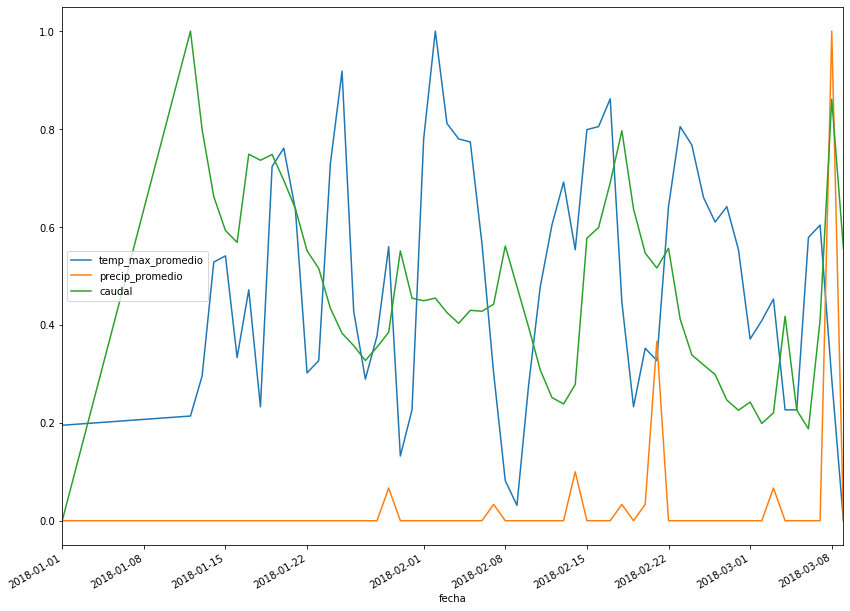

In [20]:
time_plot_estaciones_varias_columnas(11337001, 
                       ['temp_max_promedio', 'precip_promedio', 'caudal'], 
                       fecha_min = '2018-01-01', 
                       fecha_max = '2019-12-31')

## Parte 4: Nuevas Features

Iniciamos esta parte calculando la estación del año para cada uno de los registros. Para ello escribimos una función que toma la fecha y devuelve la estación del año y luego la aplicamos sobre nuestro dataframe.

In [21]:
# calculamos la estación del año para cada fecha

Y = 2000 # dummy leap year to allow input Y-02-29 (leap day)
seasons = [('summer', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('autumn', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('winter', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('spring', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('summer', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

In [22]:
df['season'] = df['fecha'].apply(get_season)

Revisamos nuevamente lo que nos quedó tomando un muestreo del dataframe

In [23]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season
26477,26477,6019003,DGA,dga_web,Rio Cachapoal En Puente Arqueado (Ca),115,-34.273102,-71.371696,60,Cachapoal Bajo,5144,2005-11-24,277.000,6019003,Rio Cachapoal En Puente Arqueado (Ca),0.0,24.299999,spring
592734,592734,5410005,DGA,dga_web,Rio Aconcagua En San Felipe,650,-32.757198,-70.736702,54,Aconcagua Medio,20264,1965-11-20,139.000,5410005,Rio Aconcagua En San Felipe,0.0,29.200001,spring
935440,935440,3450001,DGA,dga_web,Rio Copiapo En Ciudad De Copiapo,0,-27.363600,-70.339203,34,Rio Copiapo Bajo (Entre Q. Paipote Y Desemb.),5865,2003-10-04,0.184,3450001,Rio Copiapo En Ciudad De Copiapo,0.0,29.833334,spring


En las siguientes celdas calcularemos el percentil 95 de la agrupación de cada par estación del año - estación de medición.

In [24]:
def q95(x):
    return x.quantile(0.95)

In [25]:
df_percentiles = df.groupby(['season', 'codigo_estacion']).agg({'caudal':[q95],
                                                                'precip_promedio':[q95],
                                                                'temp_max_promedio':[q95]})
df_percentiles.columns = ['_'.join(col).strip() for col in df_percentiles.columns.values]
df_percentiles.reset_index(inplace=True)

Notemos que este calculo nos queda en un dataframe del siguiente estilo. Por lo que tendremos que hacer un merge con nuestro dataframe original

In [26]:
df_percentiles.sample(3)

,season,codigo_estacion,caudal_q95,precip_promedio_q95,temp_max_promedio_q95
178,spring,4714001,1.43,0.000000,31.000000
391,summer,11542001,1578.00,6.600000,27.581251
51,autumn,5410002,28.80,10.498333,28.799999


In [27]:
df = df.merge(df_percentiles, on = ['season', 'codigo_estacion'], how='left')

In [28]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95
1338501,1338501,2110001,DGA,dga_web,Rio Loa En Escorial,2450,-22.4419,-68.888603,32,Rio Loa Medio (Entre Rio Salado Y Quebrada Ama...,7179,1965-04-28,2.310,2110001,Rio Loa En Escorial,NaN,NaN,autumn,2.8000,0.0650,20.869999
1336228,1336228,2112005,DGA,dga_web,Rio Loa Antes Zona Agricola Quillagua,950,-21.7125,-69.516701,32,Rio Loa Medio (Entre Rio Salado Y Quebrada Ama...,3768,2010-12-13,0.202,2112005,Rio Loa Antes Zona Agricola Quillagua,0.000,20.299999,spring,2.0245,0.0000,22.868125
1269765,1269765,6034023,DGA,dga_web,Estero Chimbarongo En Puente El Huape,184,-34.6581,-71.301903,60,Rio Tinguiririca Bajo (Entre Rio Rapel Y E Rapel),2405,2010-07-12,58.600,6034023,Estero Chimbarongo En Puente El Huape,0.125,NaN,winter,94.5700,15.5875,20.534249


Ahora entonces definimos mediante una regla simple si las variables solitiadas son consideradas extremas o no.

In [29]:
df['caudal_extremo'] = np.where(df['caudal'] > df['caudal_q95'], 1, 0)
df['temp_extremo'] = np.where(df['temp_max_promedio'] > df['temp_max_promedio_q95'], 1, 0)
df['precip_extremo'] = np.where(df['precip_promedio'] > df['precip_promedio_q95'], 1, 0)

In [30]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95,caudal_extremo,temp_extremo,precip_extremo
706347,706347,3431001,DGA,dga_web,Rio Copiapo En La Puerta,915,-27.804399,-70.126900,34,R. Copiapo Medio,23794,1985-10-30,4.30,3431001,Rio Copiapo En La Puerta,0.000000,27.5,spring,4.440,0.000000,33.000,0,0,0
514871,514871,7355002,DGA,dga_web,Rio Ancoa En El Morro,402,-35.908600,-71.298103,73,Rio Loncomilla,20797,1968-08-28,4.93,7355002,Rio Ancoa En El Morro,0.000000,17.0,winter,84.395,50.750000,20.500,0,0,0
32666,32666,11530000,DGA,dga_web,Rio Baker En Desague Lago Bertrand,200,-47.066700,-72.800003,115,Rio Baker Des. Lago G. Carrera Y R De La Colonia,5384,2007-11-08,366.00,11530000,Rio Baker En Desague Lago Bertrand,0.216667,12.6,spring,622.389,7.433333,23.505,0,0,0


El método presentado es de utilidad pero tiene una desventaja, ya que aunque todos los valores de una misma estación de medición y estación del año sean muy similares, siempre se detectarán valores extremos. Para evitar esto se puede utilizar otro método que que puede mejorar esta detección, el método del IQR. Aquí se calculan el percentil 25 y 75, luego se utiliza la diferencia entre estos multiplicada por 1.5, sumada por sobre el percentil 75. Aquellos valores por sobre de esta medida serían clasificados como valores anómalos o extremos.

## Parte 5: Analisis de variable caudal extremo

Una manera sencilla de analizar la variable de caudal extremo es realizar un gráfico similar al que vimos anteriormente, es decir, un boxplot que presenta para cada cuenca los caudales de aquellos casos que son considerados extremos.

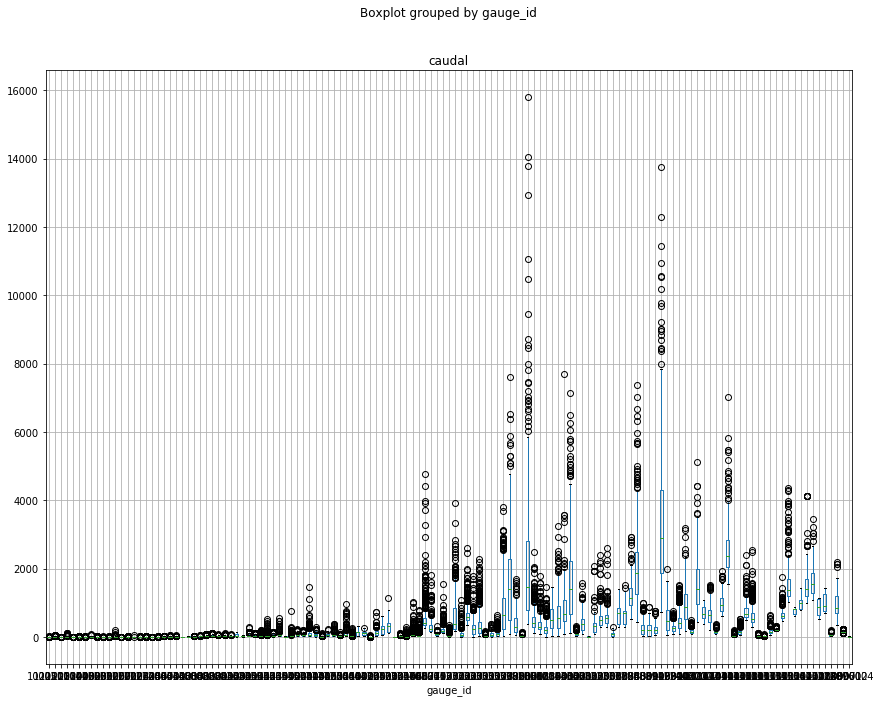

In [31]:
df[df['caudal_extremo'] == 1].boxplot(column='caudal', by='gauge_id', figsize=(14,11))

Podemos ver que en magnitud algunos caudales considerados extremos podrían no ser apropiados, ya que parecen ser valores muy pequeños y como se mencionaba anteriormente, esto se puede deber a la regla que se utilizo para la determinación del mismo.

## Parte 6: Plot porcentajes

Para poder ver una evolución relativamente clara de la variación a lo largo de los años, veremos la evolución año a año, por lo que tendremos que calcular un dataframe agrupado con el total de variables extremas en el año y el total de mediciones de ese año, para poder calcular el porcentaje.

In [37]:
df['year'] = df['fecha'].apply(lambda x: x.year)

In [38]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95,caudal_extremo,temp_extremo,precip_extremo,year
346550,346550,11315001,DGA,dga_web,Rio Claro En Pisicultura,224,-45.566700,-72.083298,113,Rio Simpson,5524,2001-12-22,2.76,11315001,Rio Claro En Pisicultura,0.0,21.200001,summer,12.80,11.200000,28.400000,0,0,0,2001
507901,507901,7359001,DGA,dga_web,Rio Loncomilla En Las Brisas,68,-35.616901,-71.767799,73,Rio Loncomilla,14849,1996-11-15,42.20,7359001,Rio Loncomilla En Las Brisas,0.0,25.600000,spring,499.60,9.472952,29.125000,0,0,0,1996
600984,600984,5410005,DGA,dga_web,Rio Aconcagua En San Felipe,650,-32.757198,-70.736702,54,Aconcagua Medio,20264,1987-11-24,151.00,5410005,Rio Aconcagua En San Felipe,0.0,28.000000,spring,95.18,0.618125,30.200001,1,0,0,1987


In [39]:
df_anual = df.groupby(['year']).agg({'caudal_extremo':[sum, len],
                                     'temp_extremo':[sum, len],
                                     'precip_extremo':[sum, len]})
df_anual.columns = ['_'.join(col).strip() for col in df_anual.columns.values]
df_anual.reset_index(inplace=True)

In [40]:
df_anual['%caudal_extremo'] = df_anual['caudal_extremo_sum'] / df_anual['caudal_extremo_len']
df_anual['%temp_extremo'] = df_anual['temp_extremo_sum'] / df_anual['temp_extremo_len']
df_anual['%precip_extremo'] = df_anual['precip_extremo_sum'] / df_anual['precip_extremo_len']

In [34]:
df_anual.sample(3)

,fecha,caudal_extremo_sum,caudal_extremo_len,temp_extremo_sum,temp_extremo_len,precip_extremo_sum,precip_extremo_len,%caudal_extremo,%temp_extremo,%precip_extremo
16398,2004-11-24,0,99,0,99,0,99,0.000000,0.000000,0.000000
6410,1977-07-21,14,50,0,50,40,50,0.280000,0.000000,0.800000
12044,1992-12-23,14,71,5,71,2,71,0.197183,0.070423,0.028169


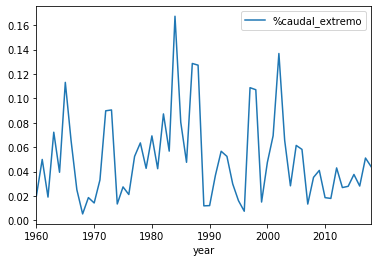

In [41]:
df_anual.plot(x='year', y='%caudal_extremo')

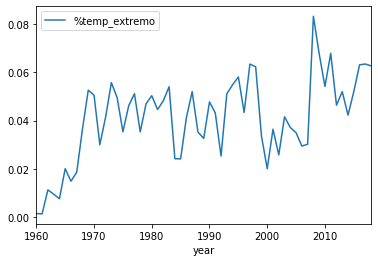

In [42]:
df_anual.plot(x='year', y='%temp_extremo')

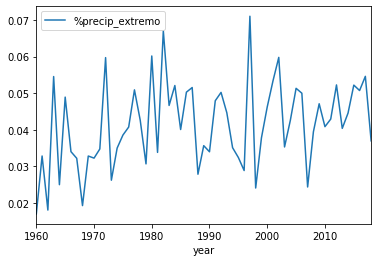

In [43]:
df_anual.plot(x='year', y='%precip_extremo')

Se puede apreciar de los gráficos anteriores, que no necesariamente se han vuelto más comunes porcentualmente los caudales ecxtremos, si se aprecia un potencial aumento en la cantidad de temperaturas extremas, mientras que las precipitaciones parecieran mantenerse relaativamente constantes.

## Parte 7

Para esta parte decidí implementar un modelo relativamente complejo que captura el patrón del comportamiento del caudal 1 semana antes de que ocurra el evento de caudal extremo. Para ello, se utiliza RNN con su variante Long Short Term Memory.

Como se mencinó anteriormente, la magnitud de los caudales para cada cuenca son muy diferentes, por lo que tendremos que estandarizar por estación de medición y estación del año.

Lo primero que haremos es calcular los promedios por cada estación del año y de medición.

In [44]:
df_promedios_estaciones = df.groupby(['season', 'codigo_estacion']).agg({'caudal':['mean'],
                                                                         'precip_promedio':['mean'],
                                                                         'temp_max_promedio':['mean']})
df_promedios_estaciones.columns = ['_'.join(col).strip() for col in df_promedios_estaciones.columns.values]
df_promedios_estaciones.reset_index(inplace=True)

df = df.merge(df_promedios_estaciones, on = ['season', 'codigo_estacion'], how='left')

In [45]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95,caudal_extremo,temp_extremo,precip_extremo,year,caudal_mean,precip_promedio_mean,temp_max_promedio_mean
542286,542286,7357002,DGA,dga_web,Rio Loncomilla En Bodega,110,-35.816700,-71.833298,73,Rio Loncomilla,15949,2012-01-10,5.79,7357002,Rio Loncomilla En Bodega,0.000000,26.0,summer,36.9,1.357019,32.98,0,0,0,2012,16.214799,0.500777,28.016566
993727,993727,8106001,DGA,dga_web,Rio ÑUble En San Fabian,410,-36.570301,-71.554703,81,Rio Nuble Alto (Hasta Bajo Junta Estero Pangue),17940,1968-07-03,20.90,8106001,Rio ÑUble En San Fabian,0.000000,6.0,winter,382.0,53.541667,21.00,0,0,0,1968,143.787475,9.991098,11.680697
29650,29650,8140002,DGA,dga_web,Rio Itata En Paso Hondo,26,-36.626099,-72.489197,47,Rio Itata Bajo (Entre Rio Nuble Y Desembocadura),4177,2013-03-02,20.60,8140002,Rio Itata En Paso Hondo,0.577273,27.5,summer,80.2,3.610000,33.50,0,0,0,2013,32.950550,0.818577,27.811068


Ahora calculamos el incremento porcentual de las variables caudal, precip y temp. con respecto al promedio por estación del año y de medicón anteriormente calculados.

In [46]:
df['caudal_incr_porce'] = (df['caudal'] - df['caudal_mean']) / df['caudal_mean']

In [47]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95,caudal_extremo,temp_extremo,precip_extremo,year,caudal_mean,precip_promedio_mean,temp_max_promedio_mean,caudal_incr_porce
430736,430736,9116001,DGA,dga_web,Rio Cholchol En Cholchol,20,-38.608101,-72.847801,91,R. Chol Chol,22722,1995-10-05,105.0,9116001,Rio Cholchol En Cholchol,18.071428,13.2,spring,198.00,11.537778,26.200001,0,0,1,1995,93.182734,2.200646,19.202804,0.126818
56782,56782,11040001,DGA,dga_web,Rio Palena Bajo Junta Rosselot,40,-43.818901,-72.383301,110,Rio Palena Bajo (Bajo Junta Rosselot Y Desemb),6244,2000-02-07,902.0,11040001,Rio Palena Bajo Junta Rosselot,1.600000,23.6,summer,1535.45,21.235334,29.180000,0,0,0,2000,692.246924,3.940790,20.285150,0.303003
1185652,1185652,10364001,DGA,dga_web,Rio Rahue En Forrahue,17,-40.516701,-73.283302,103,Rio Rahue Bajo (Entre Antes Jta R Negro R Bueno),10587,2008-01-07,74.1,10364001,Rio Rahue En Forrahue,4.971428,23.5,summer,190.00,9.396000,28.850000,0,0,0,2008,102.596320,1.761948,22.764829,-0.277752


Ordenamos por fecha el dataframe ya que es necesario para que las secuencias que generaremos sean ordenadas.

In [48]:
df.sort_values(by=['fecha'], inplace = True)

In [49]:
df.head(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95,caudal_extremo,temp_extremo,precip_extremo,year,caudal_mean,precip_promedio_mean,temp_max_promedio_mean,caudal_incr_porce
1119288,1119288,4523002,DGA,dga_web,Rio Grande En Puntilla San Juan,420,-30.704700,-70.924400,45,Rio Grande Medio (Arriba Junta Rapel Y E Paloma),25038,1960-01-02,6.23,4523002,Rio Grande En Puntilla San Juan,0.0,NaN,summer,26.40,0.00,31.15,0,0,0,1960,5.361704,0.018929,26.167603,0.161944
454431,454431,5423003,DGA,dga_web,Rio Aconcagua En Romeral,365,-32.840302,-71.025597,54,Aconcagua Bajo,11305,1960-01-02,88.90,5423003,Rio Aconcagua En Romeral,0.0,NaN,summer,91.17,0.00,31.60,0,0,0,1960,23.696722,0.076707,27.202718,2.751574
995307,995307,8106001,DGA,dga_web,Rio ÑUble En San Fabian,410,-36.570301,-71.554703,81,Rio Nuble Alto (Hasta Bajo Junta Estero Pangue),17940,1960-01-02,118.00,8106001,Rio ÑUble En San Fabian,0.0,NaN,summer,124.00,3.65,30.60,0,0,0,1960,50.487003,0.991618,24.468407,1.337235


Ya que la función que utilizaremos para generar la secuencia de datos es muy intensiva computacionalmente, utilizaremos una librería llamada dask que nos permitirá tomar nuestro dataframe y aplicarle una fuención mediante computación paralela, pudiendo utilizar todos los núcleos de la CPU.

De esta manera calcularemos una lista con la secuencia de los caudales de 7 días anteriores para cada fila de nuestro dataset.

In [50]:
import dask.dataframe as dd
from dask.multiprocessing import get
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=5, threads_per_worker=2)
client = Client(cluster, asynchronous=True,
                memory_limit='8GB')

ddata = dd.from_pandas(df, npartitions=36)

df['seq'] = ddata.map_partitions(lambda df_aux: df_aux.apply(lambda row: list(df_aux['caudal_incr_porce'][(df_aux['codigo_estacion'] == row['codigo_estacion']) & 
                                                               (df_aux['fecha'] < row['fecha']) & 
                                                               (df_aux['fecha'] >= row['fecha'] - pd.Timedelta(days=7))])
                                 , axis=1)).compute(scheduler=client)

C:\Users\gnico\Miniconda3\envs\datascience2\lib\site-packages\distributed\worker.py:3239: UserWarning: Large object of size 7.53 MB detected in task graph: 
  (         Unnamed: 0  codigo_estacion institucion  ... 75060eea92c81')
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)


In [51]:
df.sample(3)

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,precip_promedio_q95,temp_max_promedio_q95,caudal_extremo,temp_extremo,precip_extremo,year,caudal_mean,precip_promedio_mean,temp_max_promedio_mean,caudal_incr_porce,seq
380018,380018,9437002,DGA,dga_web,Rio Tolten En Teodoro Schmidt,15,-39.014400,-73.082802,94,Tolten Bajo,9735,2013-02-24,211.00,9437002,Rio Tolten En Teodoro Schmidt,0.015385,21.299999,summer,443.00,15.390035,30.200001,0,0,0,2013,257.841643,2.407671,23.053557,-0.181668,"[-0.16227651490809908, -0.18554661171620745, -..."
919025,919025,4730001,DGA,dga_web,Rio Choapa Aguas Arriba Estero La Canela,40,-31.583599,-71.460602,47,Rio Choapa Bajo (Entre Rio Illapel Y Desemb.),15598,1970-01-22,0.23,4730001,Rio Choapa Aguas Arriba Estero La Canela,0.000000,26.600000,summer,35.20,0.000000,31.187500,0,0,0,1970,8.462721,0.018914,27.080376,-0.972822,"[-0.9769577655872479, -0.9714039962672514, -0...."
778754,778754,2104003,DGA,dga_web,"Rio Loa En Alcantarilla Conchi N""2",2932,-21.975599,-68.607498,21,Rio Loa Alto (Bajo Junta Rio Salado),9131,1982-11-25,1.07,2104003,"Rio Loa En Alcantarilla Conchi N""2",0.000000,17.100000,spring,1.08,0.000000,22.200001,0,0,0,1982,0.674522,0.021050,18.020420,0.586309,"[0.6011347324703338, 0.6011347324703338, 0.571..."


Revisaremos además la longitud de las secuencias que hemos obtenido, ya que es esperable que no todas las estaciones de medición cuenten con datos de caudales 7 días consecutivos.

In [52]:
df['len_seq'] = df['seq'].apply(len)

In [53]:
df[df['len_seq'] == 7].shape

(871135, 31)

In [54]:
df[(df['len_seq'] == 7) & (df['caudal_extremo'] == 1)].shape

(42712, 31)

Como vemos lo que se chequea es cuantos registros poseen una secuencia de 7 días consecutivos anterior a su medición y tambien cuantos de estos casos son caudales extremos.

Tomé la decisión de utilizar solo aquellos registros que poseen un historial de mediciones de 7 días consecutivos. Notaremos además que la muestra con la que nos encontramos está desbalanceada.

Tomaremos la precaución y calcularemos el peso que tendremos que asignarle a los registros que no son caudal extremo para poder balancear la muestra

In [55]:
peso_0 = df[(df['len_seq'] == 7) & (df['caudal_extremo'] == 1)].shape[0] / df[df['len_seq'] == 7].shape[0]
peso_0

0.0490302880724572

La idea aquí sería utilizar la misma cantidad de datos con secuencias igual a 7 (se pone la condición sobre los datos que se debe poseer una semana completa de datos) con caudal extremo y sin caudal extremo.

Creo que la variable caudal está correlacionada con las variables de temperatura y de precipitaciones, por lo que debería representar de buena manera la secuencia de eventos que desencadenan a un caudal extremo.

Utilizaremos Keras para estimar nuestro modelo secuencial que consistirá en una capa de LSTM y una capa densa de 1 neurona con una función de activación sigmoide para obtener la probabilidad que buscamos.

Además, realizamos el clasico preprocesamiento de los datos que nos permiten llegar a un dataset de entrenamiento y un dataset de validación, donde arbitrariamente y tomando en cuenta la cantidad de datos que poseemos, se utilizará una proporción de 70% para entrenamiento y 30% para validación

from keras.preprocessing.sequence import pad_sequences

In [56]:
df_2 = df[(df['len_seq'] == 7)].copy()

In [58]:
#data = pad_sequences(df_2['seq'], maxlen=7)
data = np.array(df_2['seq'].values.tolist())
data

array([[-0.07110946, -0.40560046, -0.22705459, ...,  0.23626064,
         0.42836696,  0.75607773],
       [-0.02053353, -0.02053353, -0.01247208, ..., -0.01247208,
        -0.02859498, -0.01247208],
       [-0.55018679, -0.53209779, -0.54415713, ..., -0.55018679,
        -0.54536306, -0.55018679],
       ...,
       [-0.22458904, -0.24222347, -0.24538759, ..., -0.22368213,
        -0.24538759, -0.24538759],
       [-0.99859668, -0.99859668, -0.99859668, ..., -0.99859668,
         0.24345658,  0.37895881],
       [-0.98078845, -0.97996262, -0.97891946, ..., -0.98009301,
        -0.97757204, -0.97709393]])

In [59]:
labels = np.array(df_2['caudal_extremo']) 
labels

array([0, 0, 0, ..., 0, 0, 0])

Aqui utilizaremos una semilla de numpy que nos servirá para replicar como se mezclan los datos en el paso siguiente. Esta mezcla es necesaria para que el modelo al ser estimado en batches de datos no los utilice de manera secuencial.

In [60]:
np.random.seed(12)

In [61]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [62]:
training_samples = int(len(indices) * .7)
validation_samples = len(indices) - training_samples

In [63]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

Notemos que la capa LSTM requiere una forma un poco más particular de los datos, ya que se encuentra preparada para recibir más de 1 feature, por lo que se hace el reshape de los datos de entrenamiento y validación.

In [64]:
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], n_features))

A continuación preparamos la red neuronal y hacemos el fit del modelo. Utilizaremos 10 epoch como un número relativamente estándar que no requiere una cantidad muy grande de tiempo de procesamiento y que no nos ha causado overfitting.

In [65]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32 # hyperparámetro relacionado con la compejidad de la capa

model = Sequential()
model.add(LSTM(units, activation='relu', input_shape=(7, 1)))
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [66]:
class_weight = {0: peso_0,
                1: 1.}

In [67]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_valid, y_valid),
                    class_weight=class_weight)
model.save("rnn_lstm_caudal_extremo_v1.h5")

Instructions for updating:
Use tf.cast instead.
Train on 609794 samples, validate on 261341 samples
Epoch 1/10
609794/609794 [==============================] - 81s 132us/step - loss: 0.0313 - acc: 0.8557 - val_loss: 0.3197 - val_acc: 0.8459
Epoch 2/10
609794/609794 [==============================] - 84s 137us/step - loss: 0.0322 - acc: 0.8593 - val_loss: 0.2544 - val_acc: 0.8909
Epoch 3/10
609794/609794 [==============================] - 83s 136us/step - loss: 0.0331 - acc: 0.8602 - val_loss: 0.3364 - val_acc: 0.8634
Epoch 4/10
609794/609794 [==============================] - 83s 137us/step - loss: 0.0346 - acc: 0.8629 - val_loss: 0.3322 - val_acc: 0.8617
Epoch 5/10
609794/609794 [==============================] - 83s 137us/step - loss: 0.0447 - acc: 0.8533 - val_loss: 0.3282 - val_acc: 0.8647
Epoch 6/10
609794/609794 [==============================] - 83s 137us/step - loss: 0.0376 - acc: 0.8590 - val_loss: 0.3259 - val_acc: 0.8643
Epoch 7/10
609794/609794 [============================

Para ver la evolución de nuestro modelo a lo largo de los epoch, realizamos los siguientes gráficos que nos permiten realimentar lo que estamos haciendo y darnos cuenta de si tenemos underfitting u overfitting.

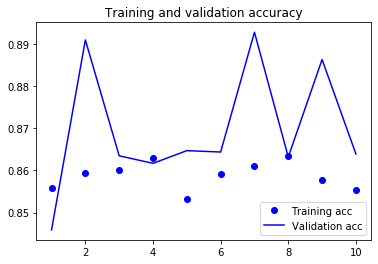

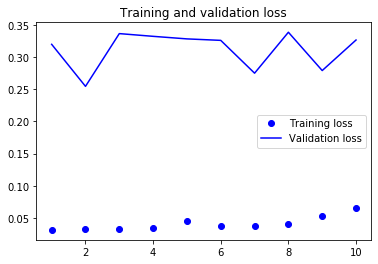

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

De los gráficos anteriores podemos ver que el modelo no mejora demasiado a medida que avanzan los epoch, más bien se queda en un nivel inicial, que no es para nada menor.

Calcularemos la matriz de confusión que considero es una buena medida para apreciar lo que realmente está haciendo la red.

In [69]:
from sklearn.metrics import confusion_matrix

y_valid_hat =  model.predict_classes(X_valid)

tn, fp, fn, tp = confusion_matrix(y_valid, y_valid_hat).ravel()

(tn, fp, fn, tp)

(214927, 33538, 2038, 10838)

Calcularemos tambien el true positive rate que representa de alguna manera lo que es importante en este fenómeno.

In [70]:
true_positive_rate = tp / (tp + fn)
true_positive_rate

0.8417210313762038

### Nota: (a)
Creo que el true positive rate representa de buena manera la importancia del fenómeno, ya que al tratarse de caudales extremos y desbordamientos de ríos, lo importante es detectar de buena manera los casos positivos de forma correcta, ya que los falsos negativos solo podrían llevar a tomar medidas de precaución que no serán usadas, sin embargo los falsos negativos pueden llevar a catastrofes.

Por simpleza solo utilicé la información del caudal, que es una representación de lo que está pasando con el entorno. Además, resulta positivo que sea una información disponible para todas las cuencas.

### Nota: (b)
Como menciono en la parte anterior, al utilizar el true positive ratio se captura lo que se pregunta en esta parte, el modelo utilizado captura de manera correcta aproximadamente el 84% de los casos positivos. Siendo autocrítico, creo que para este fenómeno lo ideal sería lograr capturar un 95% de los casos al menos, sin embargo, como se habla al principio, la definición de caudal extremo que generamos no necesariamente está asociada a un desastre, por lo que el 84% es un número bastante interesante.